# Questions to answer for my project.


### What type of movie gives the most profit?
* What genre makes the most money?
* What's the most optimal release date. 
 (to look into more, does release date and genre matter?)
* Does Ratings have an impact on how much gross income a movie makes?
* Budget relationship to how much a movie makes?
* (if i can i would like to see if any directors have impacts on movie income)

# What graphs will I be using?

* I want to use bar graphs to show what on average how much each genre makes. 
* I will possibly use a pie chart to show how many movies have been made in each genre.
* I will use a scatter plot to show if release date and genre have any correlation for most opimal amount of money.
(I want to use possibly one graph to show maybe 3 genres [i would use different colors] and each month has the average gross for each genre.)
* I want to use a box plot to show one average how much each genre is making.
* I want to use a 

### My code/ thinking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option("display.precision", 2)

In [2]:
tn_moviebudget = pd.read_csv('zippedData/tn.movie_budgets.csv')
imdb_rating = pd.read_csv('zippedData/imdb.title.ratings.csv')
rt_general = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t')
rt_review = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='ISO-8859-1')
tmdb_basic = pd.read_csv('zippedData/tmdb.movies.csv')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv')
imdb_nameofcrew = pd.read_csv('zippedData/imdb.name.basics.csv')
imdb_nameofmovies = pd.read_csv('zippedData/imdb.title.akas.csv')
imdb_basic = pd.read_csv('zippedData/imdb.title.basics.csv')
bom_movieinfo = pd.read_csv('zippedData/bom.movie_gross.csv')

In [3]:
bom_movieinfo.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,4.15e+08,652000000,2010
1,Alice in Wonderland (2010),BV,3.34e+08,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,2.96e+08,664300000,2010
3,Inception,WB,2.93e+08,535700000,2010
4,Shrek Forever After,P/DW,2.39e+08,513900000,2010


In [4]:
imdb_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
imdb_basic.head() 
#checking if my dataframes are there.

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# Genres

### How to get unique genres no duplicates

In [6]:
Genres = imdb_basic.dropna(subset=['genres']) #assigned a variable to the dropped rows in the genre columns.
Genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [7]:
#split genres to only one genre  
#loop over genre column to break up data with more than one genre.
#get unique genres.

genres = {} #creating a dictionary to use in our loop.
for idx, row in Genres.iterrows():  #looping through our column genres to split strings to individual ones.
    g = str(row.genres) #we are saving the string in g from our column genre. 
    split = g.split(',')    #we are splitting the list of strings (if there is any) by the apostrophe, and saving it to a variable.
    for s in split:         #Now we are looping over the list created from the .split to get our individual string.
        if s in genres:     #If there is a genre in our dictionary Genres
            genres[s] += 1  #Add one to our dictionary
        else:
            genres[s] = 1   #if there is no genre in the dictionary then just save it in.

genres
    

{'Action': 10335,
 'Crime': 6753,
 'Drama': 49883,
 'Biography': 8722,
 'Comedy': 25312,
 'Fantasy': 3516,
 'Horror': 10805,
 'Thriller': 11883,
 'Adventure': 6465,
 'Animation': 2799,
 'Documentary': 51640,
 'History': 6225,
 'Mystery': 4659,
 'Sci-Fi': 3365,
 'Romance': 9372,
 'Family': 6227,
 'War': 1405,
 'Music': 4314,
 'Sport': 2234,
 'Western': 467,
 'Musical': 1430,
 'Adult': 25,
 'News': 1551,
 'Talk-Show': 50,
 'Reality-TV': 98,
 'Game-Show': 4,
 'Short': 11}

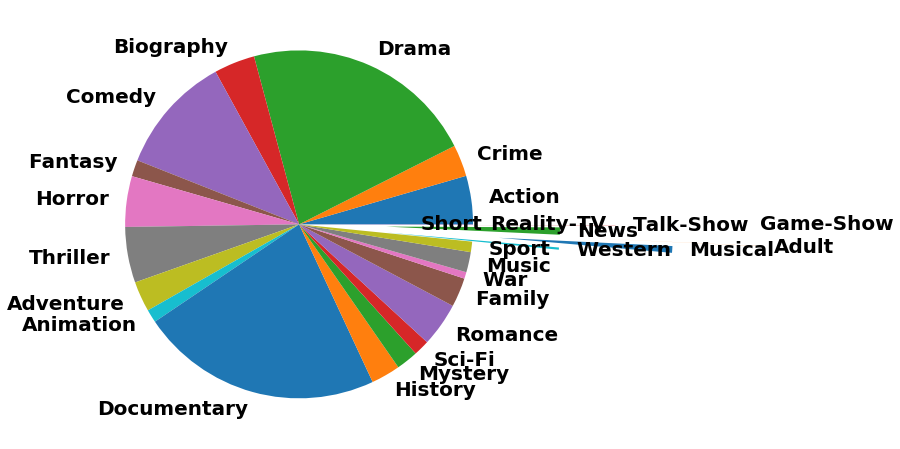

In [10]:
r = genres.values() #creating a list of our values and assigning r as our variable
e = genres.keys()  #doing the same thing as step 1 but with keys
f = [float(v) for v in r]  #used a loop for our values and assigned them to f
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.pie(f, labels =e, autopct=None, explode= (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, .5, 1.15, 1.63, .5, .82, 0, 1.55, -.4))  #created our pie chart

plt.show()

In [11]:
genre_data = pd.DataFrame(genres.items(), columns = ['genre', 'count']) #turned our dictionary to a DataFrame 

In [12]:
genre_topten = genre_data.sort_values(['count'], ascending=False)[0:10]   #sorted new dataframe by count and set the ascending to false to get the highest first. and i did [0:10] to get the top 10
genre_topten

,genre,count
10,Documentary,51640
2,Drama,49883
4,Comedy,25312
7,Thriller,11883
6,Horror,10805
0,Action,10335
14,Romance,9372
3,Biography,8722
1,Crime,6753
8,Adventure,6465


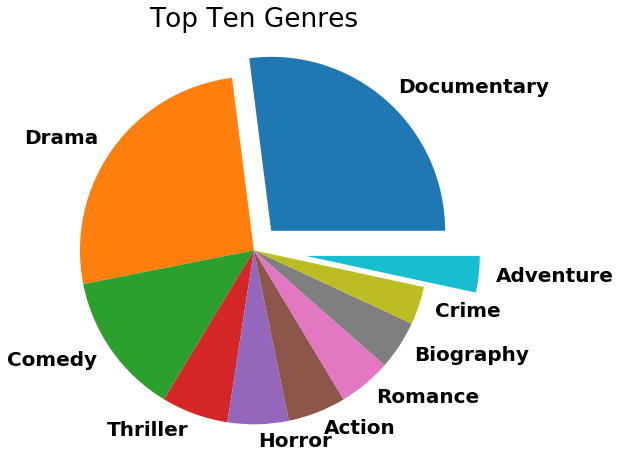

In [13]:
plt.figure(figsize=(12,8))
plt.pie(
    genre_topten['count'], labels=genre_topten['genre'], autopct=None, explode= (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.30))
plt.title('Top Ten Genres')

plt.show()

# Genres and Profits

In [14]:
Genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [15]:
tn = tn_moviebudget.rename(columns={'movie': 'primary_title'})
tn

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [16]:
genre_profit = Genres.merge(tn, how='inner', on='primary_title')  #merged two data frames to get gross and budget in one dataframe.
#we wanted inner because we and to take a look at genres and profit.
#lost alot of  data from the join, also this dataframe was the best to use since it had alot more data to use.
genre_profit 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227"
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
3,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...
3738,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008","$2,500,000","$174,255","$174,255"
3739,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982","$5,000,000","$12,592,907","$12,592,907"
3740,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226"
3741,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004","$40,000,000","$75,305,995","$124,823,094"


In [17]:
money = ['production_budget', 'domestic_gross', 'worldwide_gross'] #made a list of the columns i wanted to edit
genre_profit[money] = genre_profit[money].replace({'\$': '', ',': ''}, regex=True) #used the dataframe and the list of columns i wanted to clean. used .replace to remove dollar signs and commas.


In [19]:
#creating a loop to change the columns from strings to integers
for mon in money: #going one column at a time inside a list of three column.
    genre_profit[mon] = genre_profit[mon].astype(float)  #setting one column equal to the integer version of its string brother.
genre_profit

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",4.50e+07,0.00e+00,7.37e+04
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",2.00e+07,7.04e+07,1.22e+08
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",2.50e+07,7.21e+05,9.31e+06
3,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",2.50e+07,7.21e+05,9.31e+06
4,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013",2.50e+07,7.21e+05,9.31e+06
...,...,...,...,...,...,...,...,...,...,...,...
3738,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",2.50e+06,1.74e+05,1.74e+05
3739,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",5.00e+06,1.26e+07,1.26e+07
3740,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",2.20e+07,2.35e+07,2.79e+07
3741,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",4.00e+07,7.53e+07,1.25e+08


In [20]:
for mon in money: #did the same as before but changed the float to integer
    genre_profit[mon] = genre_profit[mon].astype(int)  
genre_profit

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302
3,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",25000000,720828,9313302
4,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013",25000000,720828,9313302
...,...,...,...,...,...,...,...,...,...,...,...
3738,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255
3739,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",5000000,12592907,12592907
3740,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226
3741,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",40000000,75305995,124823094


In [21]:
def movie_profit(c):       #in my function i am subtraction budget from worldwide profit.`
    return genre_profit['worldwide_gross'] - genre_profit['production_budget']    #had to create a function in order to use the .apply method. 

In [22]:
genre_profit['worldwide_profits'] = genre_profit['worldwide_gross'] - genre_profit['production_budget']
genre_profit

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,worldwide_profits
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,-44926294
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,102133227
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,-15686698
3,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",25000000,720828,9313302,-15686698
4,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013",25000000,720828,9313302,-15686698
...,...,...,...,...,...,...,...,...,...,...,...,...
3738,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,-2325745
3739,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,7592907
3740,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,5882226
3741,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,84823094


In [23]:
genre_profit['domestic_profits'] = genre_profit['domestic_gross'] - genre_profit['production_budget']
genre_profit

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,worldwide_profits,domestic_profits
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,-44926294,-45000000
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,102133227,50433227
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-24279172
3,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-24279172
4,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-24279172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,-2325745,-2325745
3739,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,7592907,7592907
3740,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,5882226,1530831
3741,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,84823094,35305995


In [24]:
worldmoney_ingenres = {} #creating a dictionary to use in our loop.
for idx, row in genre_profit.iterrows():  #looping through our column genres to split strings to individual ones.
    g = str(row.genres) #we are saving the string in g from our column genre. 
    split = g.split(',')    #we are splitting the list of strings (if there is any) by the apostrophe, and saving it to a variable.
    for m in split:         #Now we are looping over the list created from the .split to get our individual string.
        if m in worldmoney_ingenres:     #If there is a genre in our dictionary Genres
            worldmoney_ingenres[m] += row.worldwide_profits #adding profits from world into dict
        else:
            worldmoney_ingenres[m] = row.worldwide_profits  #if there is value place the the money in there since it is the first
worldmoney_ingenres

{'Action': 80998222693,
 'Animation': 32471107889,
 'Comedy': 58330786168,
 'Adventure': 95533302087,
 'Fantasy': 30292104451,
 'Drama': 64856754047,
 'Romance': 14569096632,
 'Documentary': 19012847346,
 'Crime': 14648863590,
 'Sci-Fi': 36270393908,
 'Family': 22153916444,
 'Thriller': 29307146743,
 'Horror': 17677768770,
 'Mystery': 11416427733,
 'Biography': 10733463343,
 'History': 3861335194,
 'News': 154607373,
 'War': 1559571293,
 'Sport': 3366353607,
 'Music': 4310045818,
 'Musical': 6395630698,
 'Western': 560171290,
 'Reality-TV': -1000000}

In [25]:
domesticmoney_ingenres = {} #creating a dictionary to use in our loop.
for idx, row in genre_profit.iterrows():  #looping through our column genres to split strings to individual ones.
    g = str(row.genres) #we are saving the string in g from our column genre. 
    split = g.split(',')    #we are splitting the list of strings (if there is any) by the apostrophe, and saving it to a variable.
    for m in split:         #Now we are looping over the list created from the .split to get our individual string.
        if m in domesticmoney_ingenres:     #If there is a genre in our dictionary Genres
            domesticmoney_ingenres[m] += row.domestic_profits
        else:
            domesticmoney_ingenres[m] = row.domestic_profits  
domesticmoney_ingenres

{'Action': 2975100648,
 'Animation': 4622271230,
 'Comedy': 11338030522,
 'Adventure': 7063229993,
 'Fantasy': 3051042144,
 'Drama': 8589803946,
 'Romance': 2971974020,
 'Documentary': 2462606565,
 'Crime': 1006142386,
 'Sci-Fi': 4407060080,
 'Family': 3989605280,
 'Thriller': 2733225596,
 'Horror': 3866540630,
 'Mystery': 2148894490,
 'Biography': 2073545600,
 'History': 112390600,
 'News': -130507514,
 'War': -31372815,
 'Sport': 815171794,
 'Music': 1283736376,
 'Musical': 2109410703,
 'Western': -155325782,
 'Reality-TV': -1000000}

In [26]:
worldmoney = pd.DataFrame(worldmoney_ingenres.items(), columns = ['genre', 'profit'])
domesticmoney = pd.DataFrame(domesticmoney_ingenres.items(), columns = ['genre', 'profit'])

In [27]:
worldmoney_topten = worldmoney.sort_values(['profit'], ascending=False)[0:10]
worldmoney_topten

,genre,profit
3,Adventure,95533302087
0,Action,80998222693
5,Drama,64856754047
2,Comedy,58330786168
9,Sci-Fi,36270393908
1,Animation,32471107889
4,Fantasy,30292104451
11,Thriller,29307146743
10,Family,22153916444
7,Documentary,19012847346


In [28]:
dm_topten = domesticmoney.sort_values(['profit'], ascending=False)[0:10]
dm_topten

,genre,profit
2,Comedy,11338030522
5,Drama,8589803946
3,Adventure,7063229993
1,Animation,4622271230
9,Sci-Fi,4407060080
10,Family,3989605280
12,Horror,3866540630
4,Fantasy,3051042144
0,Action,2975100648
6,Romance,2971974020


# Visuals

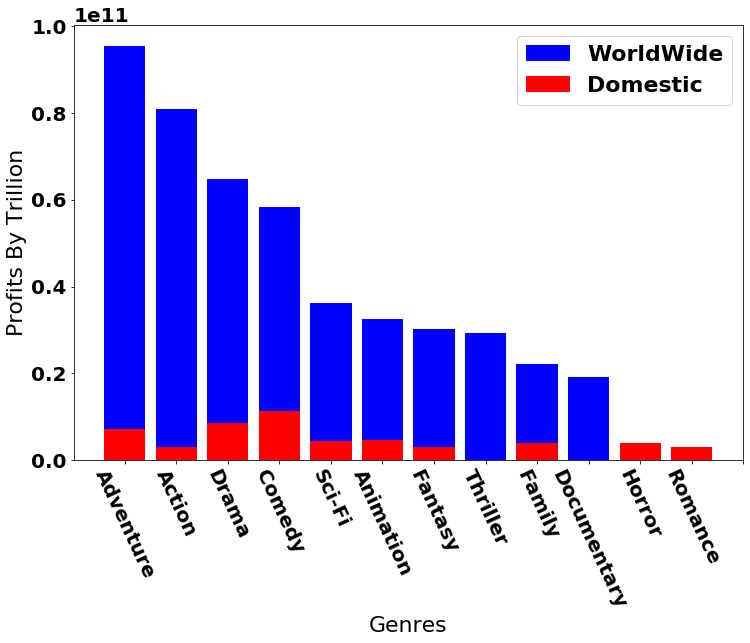

In [29]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
domestic_genres = dm_topten['genre']
world_genres = worldmoney_topten['genre']

dm_profit = dm_topten['profit']
wprofit = worldmoney_topten['profit']

plt.bar(world_genres, wprofit, color = 'blue')
plt.bar(domestic_genres, dm_profit, color = 'red')

plt.xticks(range(0,13), rotation=655)
plt.xlabel('Genres')
plt.ylabel('Profits By Trillion')
plt.legend(['WorldWide', 'Domestic'])
plt.savefig('Profits all in one')

plt.show()


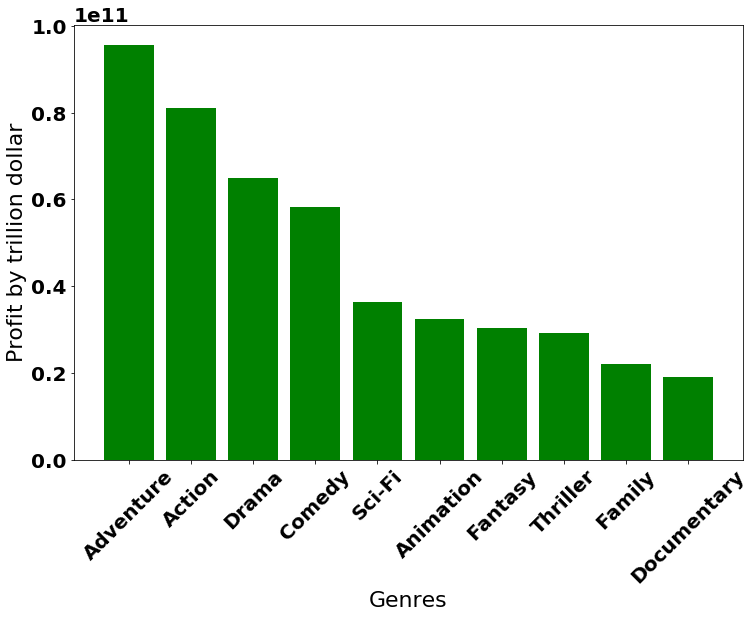

In [30]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.bar(world_genres, wprofit, color = 'green')
plt.ylabel('Profit by trillion dollar')
plt.xlabel('Genres')
plt.xticks(range(0,10), rotation=45)
plt.savefig('worldwided profit')

plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


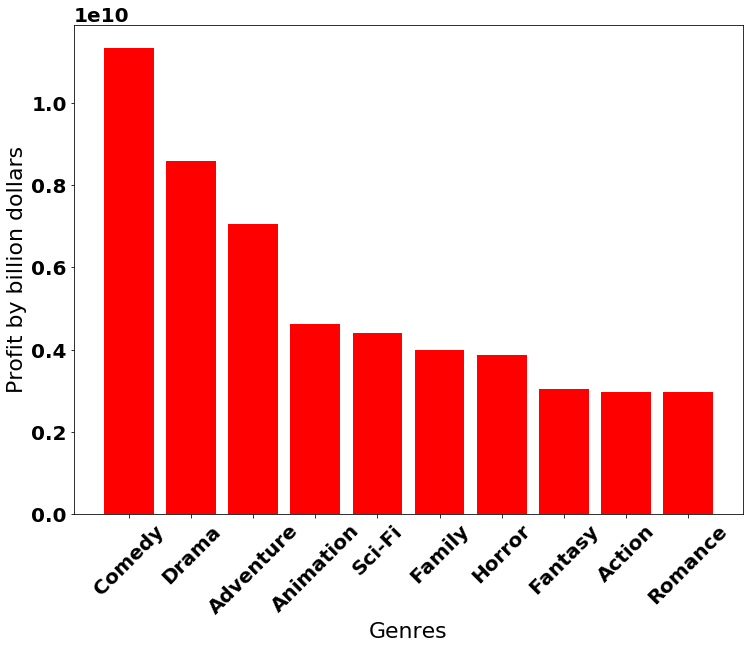

In [31]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(12,9))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.bar(domestic_genres, dm_profit, color = 'red')
plt.xlabel('Genres')
plt.ylabel('Profit by billion dollars')
plt.xticks(range(0,10), rotation=45)
plt.savefig('Domestic earnings')
plt.show()


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


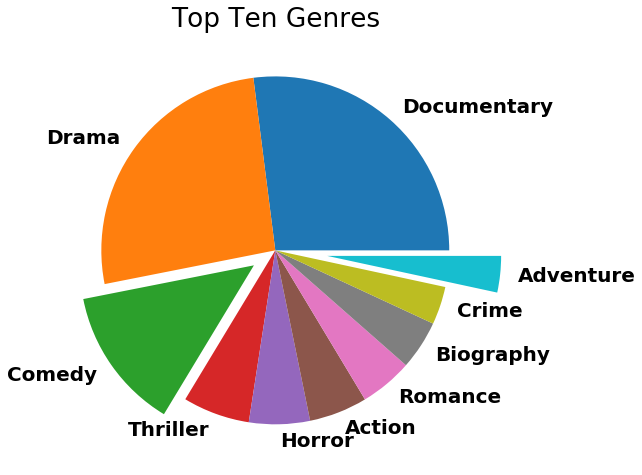

In [32]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.pie(
    genre_topten['count'], labels=genre_topten['genre'], autopct=None, explode= (0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0.30))
plt.title('Top Ten Genres')
plt.savefig('Top Ten Genres')
plt.show()